# Iris Flower : SVM Model

In his project we are creating a Support Vector Machine Classifier Model on Iris Flowers dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
df_train = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


**The iris dataset contains measurements for 150 iris flowers from three different species.**

The three classes in the Iris dataset:

    Iris-setosa (n=50)
    Iris-versicolor (n=50)
    Iris-virginica (n=50)

The four features of the Iris dataset:

    sepal length in cm
    sepal width in cm
    petal length in cm
    petal width in cm

# EDA

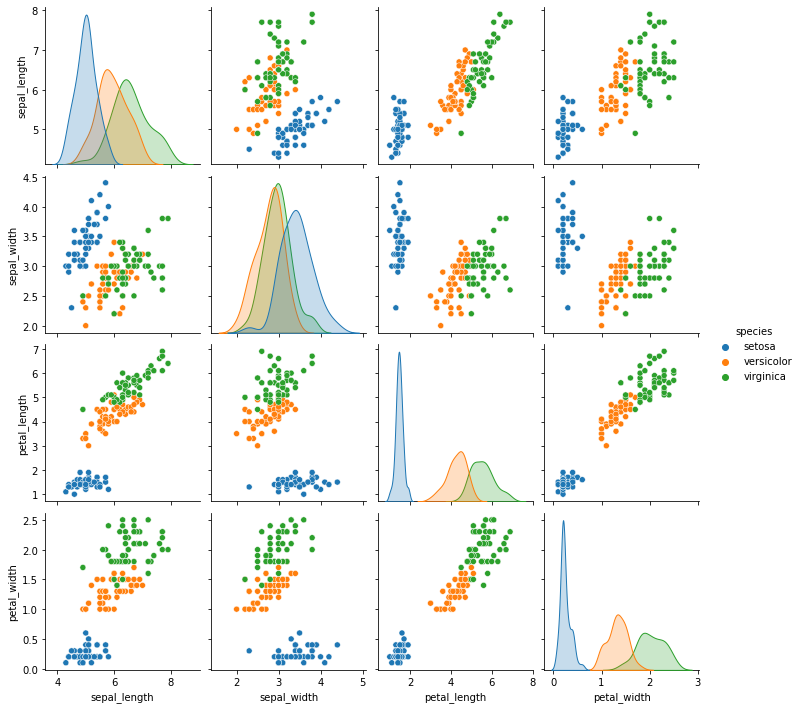

In [5]:
iris_plot = sns.load_dataset('iris')
sns.pairplot(iris_plot, hue ='species')

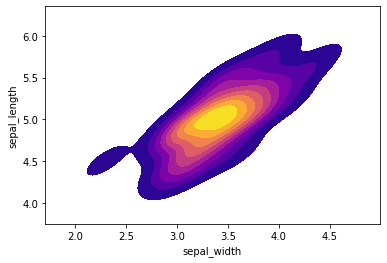

In [41]:
setosa = iris_plot[iris_plot['species'] == 'setosa']
sns.kdeplot(x = setosa['sepal_width'], y = setosa['sepal_length'],
                 cmap="plasma", shade=True)

# Train_Test_Split

In [43]:
X = df_train
y = iris['target']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.95      0.97        20
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]


# SVM Model

In [46]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, svc_predict))
print('\n')
print(confusion_matrix(y_test, svc_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.95      0.97        20
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]


# Grid Search Method

In [57]:
from sklearn.model_selection import GridSearchCV
grid_param = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[1, 0.5, 0.01, 0.0025,0.00005]}
grid = GridSearchCV(SVC(), grid_param, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.905, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=1.000, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.905, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.905, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.952, total=   0.0s
[CV] C=0.1, gamma=0.5 ................................................
[CV] .................... C=0.1, gamma=0.5, score=1.000, total=   0.0s
[CV] C=0.1, gamma=0.5 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................... C=1, gamma=0.0025, score=0.714, total=   0.0s
[CV] C=1, gamma=0.0025 ...............................................
[CV] ................... C=1, gamma=0.0025, score=0.714, total=   0.0s
[CV] C=1, gamma=0.0025 ...............................................
[CV] ................... C=1, gamma=0.0025, score=0.714, total=   0.0s
[CV] C=1, gamma=0.0025 ...............................................
[CV] ................... C=1, gamma=0.0025, score=0.714, total=   0.0s
[CV] C=1, gamma=5e-05 ................................................
[CV] .................... C=1, gamma=5e-05, score=0.333, total=   0.0s
[CV] C=1, gamma=5e-05 ................................................
[CV] .................... C=1, gamma=5e-05, score=0.333, total=   0.0s
[CV] C=1, gamma=5e-05 ................................................
[CV] .................... C=1, gamma=5e-05, score=0.714, total=   0.0s
[CV] C=1, gamma=5e-05 ................................................
[CV] .

[CV] ................ C=1000, gamma=0.0025, score=0.952, total=   0.0s
[CV] C=1000, gamma=5e-05 .............................................
[CV] ................. C=1000, gamma=5e-05, score=1.000, total=   0.0s
[CV] C=1000, gamma=5e-05 .............................................
[CV] ................. C=1000, gamma=5e-05, score=1.000, total=   0.0s
[CV] C=1000, gamma=5e-05 .............................................
[CV] ................. C=1000, gamma=5e-05, score=0.857, total=   0.0s
[CV] C=1000, gamma=5e-05 .............................................
[CV] ................. C=1000, gamma=5e-05, score=0.952, total=   0.0s
[CV] C=1000, gamma=5e-05 .............................................
[CV] ................. C=1000, gamma=5e-05, score=0.952, total=   0.0s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.5s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.5, 0.01, 0.0025, 5e-05]},
             verbose=3)

In [58]:
grid.best_params_

{'C': 100, 'gamma': 0.0025}

In [59]:
grid.best_estimator_

SVC(C=100, gamma=0.0025)

In [60]:
grid_predct = grid.predict(X_test)
print(classification_report(y_test, grid_predct))
print('\n')
print(confusion_matrix(y_test, grid_predct))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



[[13  0  0]
 [ 0 20  0]
 [ 0  0 12]]


**Since the iris dataset is a small dataset, we won't be able to see large difference in the accuracy**